## Recommender system

In this notebook, we will build a movie recommendation system using the [movieLens Dataset](https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset). The dataset contains a list of movies with user ratings, and some additional information about the genre, ec..


Let's import the necessary packages.

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns


Load the data with a pandas data frame.

In [2]:
movies = pd.read_csv("data/movies.csv")
ratings = pd.read_csv("data/ratings.csv")

Let's take a look into the dataset. 

In [3]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [5]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5.0
7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
final_dataset.fillna(0,inplace=True)
final_dataset.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
7,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

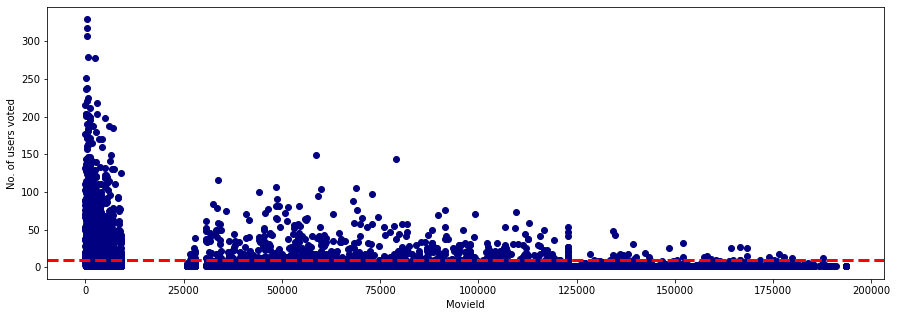

In [21]:
f,ax = plt.subplots(1,1,figsize=(15,5))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='navy')
plt.axhline(y=10,color='r', linewidth = 3, linestyle = '--')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [10]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

## Recommender system based on  K Nearest Neighbors

We can base our recommendation system on the KNN method.

In [12]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=15, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=15)

In [13]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

Finally, Let’s Recommend some movies!

In [15]:

get_movie_recommendation('Tomorrow Never Dies')

,Title,Distance
1,Live and Let Die (1973),0.517902
2,Mission: Impossible II (2000),0.517118
3,From Russia with Love (1963),0.516035
4,Die Another Day (2002),0.496791
5,Goldfinger (1964),0.486575
6,"Spy Who Loved Me, The (1977)",0.477485
7,Licence to Kill (1989),0.470667
8,Dr. No (1962),0.434677
9,"World Is Not Enough, The (1999)",0.420370
10,For Your Eyes Only (1981),0.418825


In [16]:
get_movie_recommendation('Bad Boys')

,Title,Distance
1,Be Cool (2005),0.626660
2,Cool Runnings (1993),0.625080
3,Demolition Man (1993),0.624031
4,Die Hard: With a Vengeance (1995),0.623826
5,Hot Shots! Part Deux (1993),0.623237
6,Speed (1994),0.621220
7,Beverly Hills Cop III (1994),0.592337
8,"Waterboy, The (1998)",0.583795
9,Bad Boys II (2003),0.539499
10,"Rundown, The (2003)",0.499431


## Recommensder system based on Deep Learning

In [85]:
from __future__ import print_function, division
from builtins import range, input
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow
from tensorflow import keras
from collections import Counter

In [86]:
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD

In [87]:
df = pd.read_csv('data/ratings.csv')
df.shape

(100836, 4)

In [88]:
user = df['userId'].unique()
map = {k:i for i, k in enumerate(user)}
df['userId'] = df['userId'].map(map)

mov = df['movieId'].unique()
map = {k:i for i, k in enumerate(mov)}
df['movieId'] = df['movieId'].map(map)

In [89]:
df['userId'].max(), df['userId'].min(), df['movieId'].max(), df['movieId'].min()

(609, 0, 9723, 0)

In [90]:
df.drop('timestamp', axis = 1, inplace = True)

In [91]:
n = 1500
m = 1200

ucount = Counter(df['userId'])
mcount = Counter(df['movieId'])

uid = [u for u, c in ucount.most_common(n)]
mid = [u for u, c in mcount.most_common(m)]

In [92]:
newdf = df[df['userId'].isin(uid) & df['movieId'].isin(mid)]
newdf.head(5)

,userId,movieId,rating
0,0,0,4.0
1,0,1,4.0
2,0,2,4.0
3,0,3,5.0
4,0,4,5.0


In [100]:
user = newdf['userId'].unique()
map = {k:i for i, k in enumerate(user)}
newdf['userId'] = newdf['userId'].map(map)

mov = newdf['movieId'].unique()
map = {k:i for i, k in enumerate(mov)}
newdf['movieId'] = newdf['movieId'].map(map)

In [101]:
newdf['userId'].max(), newdf['userId'].min(), newdf['movieId'].max(), newdf['movieId'].min()
newdf = shuffle(newdf)

cutoff = int(0.8*len(newdf))

train = newdf.iloc[: cutoff, :]
test = newdf.iloc[cutoff: , :]

train.shape, test.shape

((52738, 3), (13185, 3))

In [113]:
K = 50
mu = newdf['rating'].mean()
reg = .1
N = 1500
M = 1200

In [114]:
u = Input(shape = (1, ))
m = Input(shape = (1, ))

u_embed = Embedding(N, 
                    K,
                    embeddings_initializer = "he_normal",
                    embeddings_regularizer = l2(reg))(u)

m_embed = Embedding(M,
                    K,
                    embeddings_initializer = "he_normal",
                    embeddings_regularizer = l2(reg))(m)

In [115]:
u_bias = Embedding(N, 1, embeddings_regularizer = l2(reg))(u)
m_bias = Embedding(M, 1, embeddings_regularizer = l2(reg))(m)

x = Dot(axes = 2)([u_embed, m_embed])
x = Add()([x, u_bias, m_bias])
x = Flatten()(x)

model = Model(inputs = (u, m), outputs = x)

In [116]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.0001), metrics = ['mse'] )

r = model.fit(x = [train['userId'].values, train['movieId'].values],
              y = train['rating'].values - mu,
              epochs = 10,
              validation_data = ([test['userId'].values, test['movieId'].values],
                                test['rating'].values - mu)
             )

Epoch 1/10
1649/1649 [==============================] - 2s 1ms/step - loss: 3.8091 - mse: 1.0013 - val_loss: 1.0076 - val_mse: 0.9993
Epoch 2/10
1649/1649 [==============================] - 2s 1ms/step - loss: 1.0013 - mse: 0.9948 - val_loss: 1.0034 - val_mse: 0.9966
Epoch 3/10
1649/1649 [==============================] - 2s 1ms/step - loss: 1.0005 - mse: 0.9933 - val_loss: 1.0032 - val_mse: 0.9958
Epoch 4/10
1649/1649 [==============================] - 2s 1ms/step - loss: 1.0005 - mse: 0.9929 - val_loss: 1.0032 - val_mse: 0.9956
Epoch 5/10
1649/1649 [==============================] - 2s 1ms/step - loss: 1.0005 - mse: 0.9928 - val_loss: 1.0032 - val_mse: 0.9955
Epoch 6/10
1649/1649 [==============================] - 2s 1ms/step - loss: 1.0005 - mse: 0.9927 - val_loss: 1.0032 - val_mse: 0.9956
Epoch 7/10
1649/1649 [==============================] - 2s 1ms/step - loss: 1.0005 - mse: 0.9927 - val_loss: 1.0032 - val_mse: 0.9955
Epoch 8/10
1649/1649 [==============================] - 2s 1ms

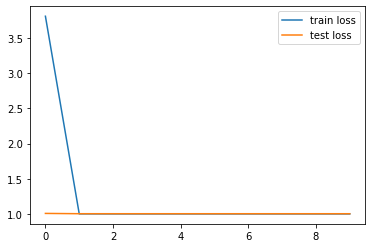

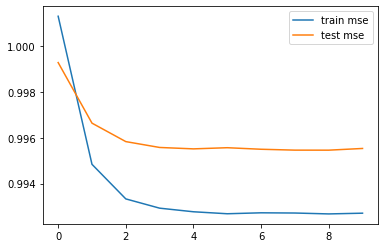

In [117]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.plot(r.history['mse'], label="train mse")
plt.plot(r.history['val_mse'], label="test mse")
plt.legend()
plt.show()

In [118]:
movie = pd.read_csv('data/movies.csv')

In [119]:
user_id = newdf['userId'].sample(1).iloc[0]
movies_watched = newdf[newdf['userId'] == user_id]
movies_not_watched = movie[~ movie['movieId'].isin(movies_watched['movieId'].values)]['movieId']
movies_not_watched

0            1
3            4
4            5
5            6
6            7
         ...  
9737    193581
9738    193583
9739    193585
9740    193587
9741    193609
Name: movieId, Length: 9571, dtype: int64

In [120]:
mid = newdf['movieId'].unique()
m2m_enc = {movie: index for index, movie in enumerate(mid)}

movies_not_watched = list(set(movies_not_watched).intersection(set(m2m_enc.keys())))
len(movies_not_watched)

731

In [121]:
movies_not_watched = [[m2m_enc.get(x)] for x in movies_not_watched]
uid = newdf['userId'].unique()
u2u_enc = {user:index for index, user in enumerate(uid)}
user= u2u_enc.get(user_id)

In [122]:
user_movie_array = np.hstack(([[user]] * len(movies_not_watched), movies_not_watched))
user_movie_df = pd.DataFrame(user_movie_array)
user_movie_df.columns = ['userId', 'movieId']
user_movie_df.head(5)

,userId,movieId
0,207,602
1,207,175
2,207,914
3,207,469
4,207,812


In [123]:
ratings = model.predict([user_movie_df['userId'].values, user_movie_df['movieId'].values]).flatten()
top_ratings_indices = ratings.argsort()[-15: ][::-1]
top_movies_user = (movies_watched.sort_values(by = 'rating', ascending = False).head(10)['movieId'].values)
movie_rows = movie[movie['movieId'].isin(top_movies_user)]
movie_rows

,movieId,title,genres
41,45,To Die For (1995),Comedy|Drama|Thriller
52,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance
55,62,Mr. Holland's Opus (1995),Drama
72,80,"White Balloon, The (Badkonake sefid) (1995)",Children|Drama
109,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
308,350,"Client, The (1994)",Drama|Mystery|Thriller
505,587,Ghost (1990),Comedy|Drama|Fantasy|Romance|Thriller


In [124]:
movie_encoded2movie = {i: x for i, x in enumerate(mid)}
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

In [125]:
recommended_movies = movie[movie["movieId"].isin(recommended_movie_ids)]

In [126]:
recommended_movies

,movieId,title,genres
69,77,Nico Icon (1995),Documentary
96,108,Catwalk (1996),Documentary
220,256,Junior (1994),Comedy|Sci-Fi
390,449,Fear of a Black Hat (1994),Comedy
438,502,"Next Karate Kid, The (1994)",Action|Children|Romance
491,564,Chasers (1994),Comedy
524,612,"Pallbearer, The (1996)",Comedy
542,639,Girl 6 (1996),Comedy|Drama
605,760,Stalingrad (1993),Drama|War
606,761,"Phantom, The (1996)",Action|Adventure
